Análisis entre índice de sentimiento de las expectativas económicas medido a través de noticias y a través de encuestas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, ks_2samp

In [2]:
df = pd.read_excel(r"./data/raw_database.xlsx", sheet_name=0)

In [3]:
# Convert index to datetime
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.set_index('fecha')

In [4]:
df

,inflacion,rem_min,pm,pm_np,p_minera,brecha_pbi,pea_ocu,pea_ocu_pe,pea_ocu_me,pea_ocu_ge,...,IPC_sin_alim,IPC_sin_alim_ener,IPC_alim_ener,IPC_imp,IPC_subyacente,IPC_transables,inflacion_exp,economia_exp,indice_sent,VIX
fecha,,,,,,,,,,,,,,,,,,,,,
2001-09-01,0.874859,500.158990,63.224181,63.078229,19.018232,0.235841,3426.457000,2320.468000,319.097510,786.891000,...,61.850849,64.343993,49.980907,49.450155,58.962831,60.037800,2.875000,NaN,NaN,31.930000
2001-10-01,0.678419,499.971617,73.576032,64.872062,21.238875,0.507608,3412.998000,2310.718000,305.876861,796.403300,...,61.714829,64.353175,50.003308,49.129408,58.979150,59.943011,2.833333,NaN,NaN,33.560001
2001-11-01,0.118321,502.448013,63.954572,62.711549,17.569666,0.680078,3447.438000,2337.939000,311.884468,797.614100,...,61.436300,64.360959,49.582595,48.803224,59.069621,59.953974,2.375000,NaN,NaN,23.840000
2001-12-01,-0.127352,502.908128,60.010244,57.421576,30.496972,0.852549,3509.056000,2397.634000,312.572240,798.849000,...,61.432236,64.567970,49.399084,48.298783,59.118108,59.687798,2.416667,NaN,NaN,23.799999
2002-01-01,-0.832736,505.536544,69.067893,62.982313,26.719937,1.025020,3517.826000,2424.519000,311.572683,781.733500,...,61.298769,64.559454,48.906341,47.919767,59.157029,59.533687,2.458333,NaN,NaN,21.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,3.237383,635.654739,125.605100,125.629270,3.547389,-1.716872,5319.700000,3328.300000,543.700000,1447.700000,...,107.920771,108.648210,116.079448,107.055187,111.206321,111.459503,3.500000,41.176471,NaN,12.450000
2024-01-01,3.023922,635.501108,121.143231,123.031371,4.440085,-1.215347,5295.449742,3304.687007,568.602593,1422.160142,...,107.874396,108.658069,116.115055,106.582527,111.327693,111.852498,3.000000,43.843284,NaN,14.350000
2024-02-01,3.294067,631.977764,114.417585,119.674448,16.771646,NaN,5322.927396,3326.561004,541.720399,1454.645992,...,108.339483,109.212695,116.825327,106.857303,111.782007,112.395714,NaN,47.177419,NaN,13.400000


In [5]:
indice_sent = df['indice_sent'].dropna()

In [6]:
# Select values from 'economia_exp' matching the indices of 'indice_sent'
economia_exp = df['economia_exp'].loc[indice_sent.index]

In [7]:
# Select values from 'economia_exp' using the shifted index
economia_exp_next = df['economia_exp'].loc[indice_sent.index.shift(1, freq='MS')]

In [8]:
economia_exp_next

fecha
2007-02-01    72.506739
2007-03-01    72.905028
2007-04-01    74.305556
2007-05-01    71.542553
2007-06-01    71.925134
                ...    
2023-04-01    43.933824
2023-05-01    44.505495
2023-06-01    42.777778
2023-07-01    44.485294
2023-08-01    44.064748
Name: economia_exp, Length: 199, dtype: float64

In [9]:
economia_exp

fecha
2007-01-01    72.115385
2007-02-01    72.506739
2007-03-01    72.905028
2007-04-01    74.305556
2007-05-01    71.542553
                ...    
2023-03-01    42.909091
2023-04-01    43.933824
2023-05-01    44.505495
2023-06-01    42.777778
2023-07-01    44.485294
Name: economia_exp, Length: 199, dtype: float64

#### 1. Correlation test

In [10]:
res1 = pearsonr(indice_sent, economia_exp)
ci1 = res1.confidence_interval(confidence_level=0.95)
res1

PearsonRResult(statistic=0.5398901236816425, pvalue=1.8892913015928963e-16)

In [11]:
res2 = pearsonr(indice_sent, economia_exp_next)
ci2 = res2.confidence_interval(confidence_level=0.95)
res2

PearsonRResult(statistic=0.5900884864619723, pvalue=4.6689396509973324e-20)

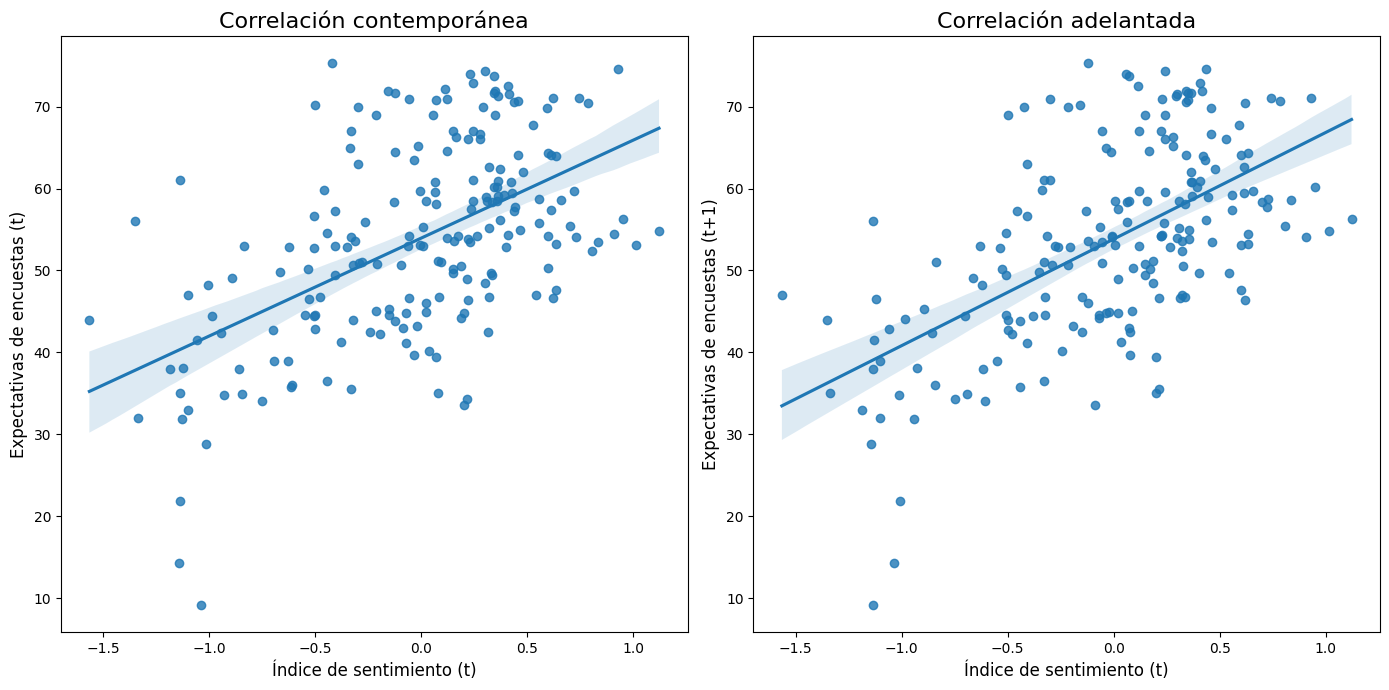

In [12]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot indice_sent vs economia_exp
sns.regplot(x=indice_sent, y=economia_exp, ax=axes[0], ci=95)
axes[0].set_title('Correlación contemporánea', fontsize=16)
axes[0].set_xlabel('Índice de sentimiento (t)', fontsize=12)
axes[0].set_ylabel('Expectativas de encuestas (t)', fontsize=12)

# Plot indice_sent vs economia_exp_next
sns.regplot(x=indice_sent, y=economia_exp_next, ax=axes[1], ci=95)
axes[1].set_title('Correlación adelantada', fontsize=16)
axes[1].set_xlabel('Índice de sentimiento (t)', fontsize=12)
axes[1].set_ylabel('Expectativas de encuestas (t+1)', fontsize=12)

# # Show the plot
plt.tight_layout()
plt.show()

#### 2. K-S test

In [13]:
# estandarizar


In [14]:
ks_stat, p_value = ks_2samp(indice_sent, economia_exp)

In [15]:
ks_2samp(indice_sent, economia_exp_next)

KstestResult(statistic=1.0, pvalue=7.751147363593723e-119, statistic_location=1.12142857142856, statistic_sign=1)

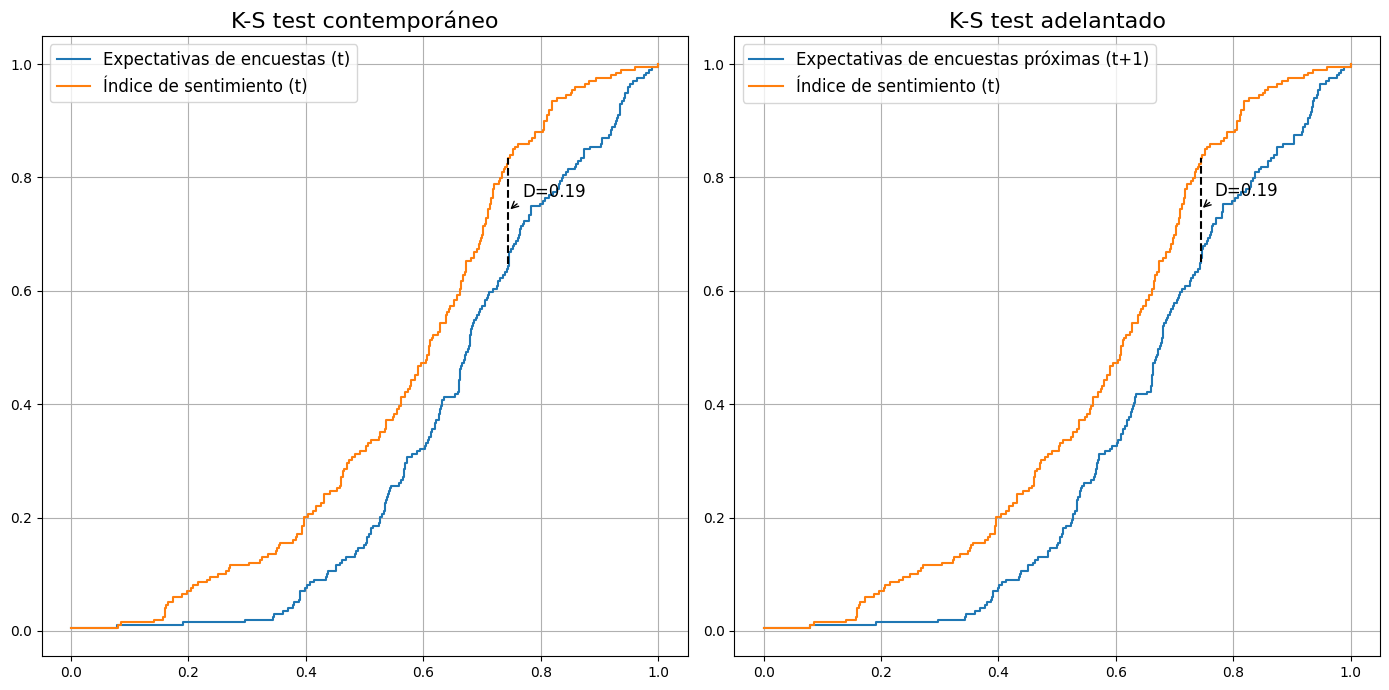

In [19]:
# Function to compute ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Function to plot ECDFs and highlight K-S test result
def plot_ks_test(data1, data2, ax, title, label1, label2):
    ks_stat, p_value = ks_2samp(data1, data2)
    
    x1, y1 = ecdf(data1)
    x2, y2 = ecdf(data2)

    ax.step(x1, y1, where='post', label=label1)
    ax.step(x2, y2, where='post', label=label2)
    
    d_statistic_x = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 1000)
    d_statistic_y1 = np.interp(d_statistic_x, x1, y1)
    d_statistic_y2 = np.interp(d_statistic_x, x2, y2)
    max_diff_index = np.argmax(np.abs(d_statistic_y1 - d_statistic_y2))

    ax.plot([d_statistic_x[max_diff_index]]*2, [d_statistic_y1[max_diff_index], d_statistic_y2[max_diff_index]], 'k--')
    ax.annotate(f'D={ks_stat:.2f}', xy=(d_statistic_x[max_diff_index], (d_statistic_y1[max_diff_index] + d_statistic_y2[max_diff_index]) / 2),
                xytext=(10, 10), textcoords='offset points', fontsize=12,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

    ax.set_title(title, fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True)

# Normalize the data
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Normalize the data
indice_sent_normalized = normalize(indice_sent)
economia_exp_normalized = normalize(economia_exp)
economia_exp_next_normalized = normalize(economia_exp_next)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for the first pair of time series
plot_ks_test(economia_exp_normalized, indice_sent_normalized, axes[0], 'K-S test contemporáneo', 'Expectativas de encuestas (t)', 'Índice de sentimiento (t)')

# Plot for the second pair of time series
plot_ks_test(economia_exp_next_normalized, indice_sent_normalized, axes[1], 'K-S test adelantado', 'Expectativas de encuestas próximas (t+1)', 'Índice de sentimiento (t)')

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
ks_2samp(economia_exp_normalized, indice_sent_normalized)

KstestResult(statistic=0.19095477386934673, pvalue=0.0013749362482976238, statistic_location=0.7420212765957472, statistic_sign=-1)